In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
in_path = "/Users/Paul/research/files/analysis/devries_sweep_analysis_new.csv"
df = pd.read_csv(in_path)

In [3]:
df.iloc[-1]

Unnamed: 0                                                     6
name           det_devries_bbvgg16_doFalse_normTrue_schedCosi...
study          new_class_study_tinyimagenet_resize_proposed_mode
model                                              det_mcd_model
network                                                      NaN
fold                                                           0
confid                                                    mcd_sv
n_test                                                     18318
accuracy                                                 0.50868
nll                                                          NaN
brier_score                                                  NaN
failauc                                                  0.90989
failap_suc                                               0.93296
failap_err                                               0.85728
mce                                                      0.24078
ece                      

In [4]:
len(df)

515

In [5]:
df.groupby("study").count()
df = df.drop(df[df.model=="mcd_sv"].index)
print(len(df))

514


In [6]:
df_clean = df.drop_duplicates(subset=["name", "study", "model", "network", "confid"])

In [7]:
len(df_clean)

465

In [8]:
df_clean.groupby("name").count()


,Unnamed: 0,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr
name,,,,,,,,,,,,,,,,,,
det_devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,10,10,10,0,10,10,10,10,2,2,10,10,10,10,10,10,10,10
det_devries_bbvgg13_doFalse_normFalse_schedMultiStep,10,10,10,0,10,10,10,10,2,2,10,10,10,10,10,10,10,10
det_devries_bbvgg13_doFalse_normTrue_schedCosineAnnealing,10,10,10,0,10,10,10,10,2,2,10,10,10,10,10,10,10,10
det_devries_bbvgg13_doFalse_normTrue_schedMultiStep,10,10,10,0,10,10,10,10,2,2,10,10,10,10,10,10,10,10
det_devries_bbvgg16_doFalse_normFalse_schedCosineAnnealing,35,35,35,0,35,35,35,35,7,7,35,35,35,35,35,35,35,35
det_devries_bbvgg16_doFalse_normFalse_schedMultiStep,35,35,35,0,35,35,35,35,7,7,35,35,35,35,35,35,35,35
det_devries_bbvgg16_doFalse_normTrue_schedCosineAnnealing,35,35,35,0,35,35,35,35,7,7,35,35,35,35,35,35,35,35
det_devries_bbvgg16_doFalse_normTrue_schedMultiStep,35,35,35,0,35,35,35,35,7,7,35,35,35,35,35,35,35,35
det_devries_bbvgg16_doTrue_normFalse_schedCosineAnnealing,35,35,35,0,35,35,35,35,7,7,35,35,35,35,35,35,35,35


In [9]:
df_clean[df_clean.name=="det_devries_bbvgg16_doTrue_normTrue_schedCosineAnnealing"]

,Unnamed: 0,name,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr
262,0,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,iid_study,det_mcd_model,NaN,0.0,det_mcp,10000.0,0.94330,0.01749,0.08632,0.93469,0.99562,0.43237,0.23694,0.01193,4.18760,5.82632,0.40564
263,1,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,iid_study,det_mcd_model,NaN,0.0,det_pe,10000.0,0.94330,0.01749,0.08632,0.93410,0.99565,0.42392,0.49708,0.01914,4.16125,5.79997,0.40212
264,2,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,iid_study,det_mcd_model,NaN,0.0,mcd_mcp,10000.0,0.94350,0.01679,0.08451,0.93757,0.99589,0.44495,0.32559,0.00872,3.92758,5.55464,0.38230
265,3,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,iid_study,det_mcd_model,NaN,0.0,mcd_pe,10000.0,0.94350,0.01679,0.08451,0.93369,0.99568,0.41497,0.67539,0.04326,4.13199,5.75905,0.45487
266,4,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,iid_study,det_mcd_model,NaN,0.0,mcd_ee,10000.0,0.94350,0.01679,0.08451,0.93246,0.99560,0.40896,0.49670,0.04055,4.20732,5.83439,0.46372
267,5,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,iid_study,det_mcd_model,NaN,0.0,mcd_mi,10000.0,0.94350,0.01679,0.08451,0.93033,0.99550,0.38366,0.62796,0.03160,4.30458,5.93164,0.47080
268,6,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,iid_study,det_mcd_model,NaN,0.0,mcd_sv,10000.0,0.94350,0.01679,0.08451,0.93172,0.99557,0.37693,0.54607,0.03162,4.23981,5.86687,0.45841
374,0,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,new_class_study_tinyimagenet_original_mode,det_mcd_model,NaN,0.0,det_mcp,19000.0,0.52632,NaN,NaN,0.92555,0.94758,0.89016,0.64017,0.29308,32.38689,168.25327,0.52567
375,1,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,new_class_study_tinyimagenet_original_mode,det_mcd_model,NaN,0.0,det_pe,19000.0,0.52632,NaN,NaN,0.93843,0.95449,0.91609,0.49222,0.22844,27.45380,163.32017,0.38333
376,2,det_devries_bbvgg16_doTrue_normTrue_schedCosin...,new_class_study_tinyimagenet_original_mode,det_mcd_model,NaN,0.0,mcd_mcp,19000.0,0.52632,NaN,NaN,0.91934,0.94168,0.88689,0.51358,0.26218,35.77559,171.64196,0.52067


In [10]:
df = df_clean

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df[(df.study == "iid_study") & ~(df.name.str.contains("det"))][["name", "confid", "accuracy", "failauc", "failap_err", "aurc"]].sort_values(by="aurc", ascending=True)

<ipython-input-11-36b5d462abf3>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,name,confid,accuracy,failauc,failap_err,aurc
23,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,devries,0.9472,0.94358,0.44349,4.71515
47,devries_bbvgg13_doFalse_normTrue_schedCosineAnnealing,devries,0.9435,0.94083,0.43695,5.29982
21,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,det_mcp,0.9472,0.93673,0.47155,5.30790
22,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,det_pe,0.9472,0.93647,0.48577,5.34752
17,devries_bbvgg13_doFalse_normTrue_schedMultiStep,devries,0.9459,0.93640,0.41504,5.52651
107,devries_bbvgg16_doFalse_normTrue_schedCosineAnnealing,devries,0.9421,0.93866,0.44536,5.65903
2,devries_bbvgg13_doFalse_normFalse_schedMultiStep,devries,0.9428,0.93873,0.44820,5.72484
105,devries_bbvgg16_doFalse_normTrue_schedCosineAnnealing,det_mcp,0.9421,0.93549,0.46760,5.97229
45,devries_bbvgg13_doFalse_normTrue_schedCosineAnnealing,det_mcp,0.9435,0.93512,0.46205,5.99192
75,devries_bbvgg16_doFalse_normFalse_schedCosineAnnealing,det_mcp,0.9419,0.93483,0.45382,6.03250


In [12]:
##  observations:
##  iid: cosine > multilr. norm equal. vgg16_do_false: good accuracy, horrible auc/aurc. if vgg16, then with do.


In [13]:
meanprops = dict(linestyle='-', linewidth=1, color='k', alpha=0.5)
whiskerprops=dict(linestyle='-', linewidth=0)

In [14]:
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["sched"] = df.apply(lambda row: row["name"].split("sched")[1], axis=1)
df["pure_det"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)
df["norm"] = df.apply(lambda row: row["name"].split("norm")[1].split("_")[0], axis=1)

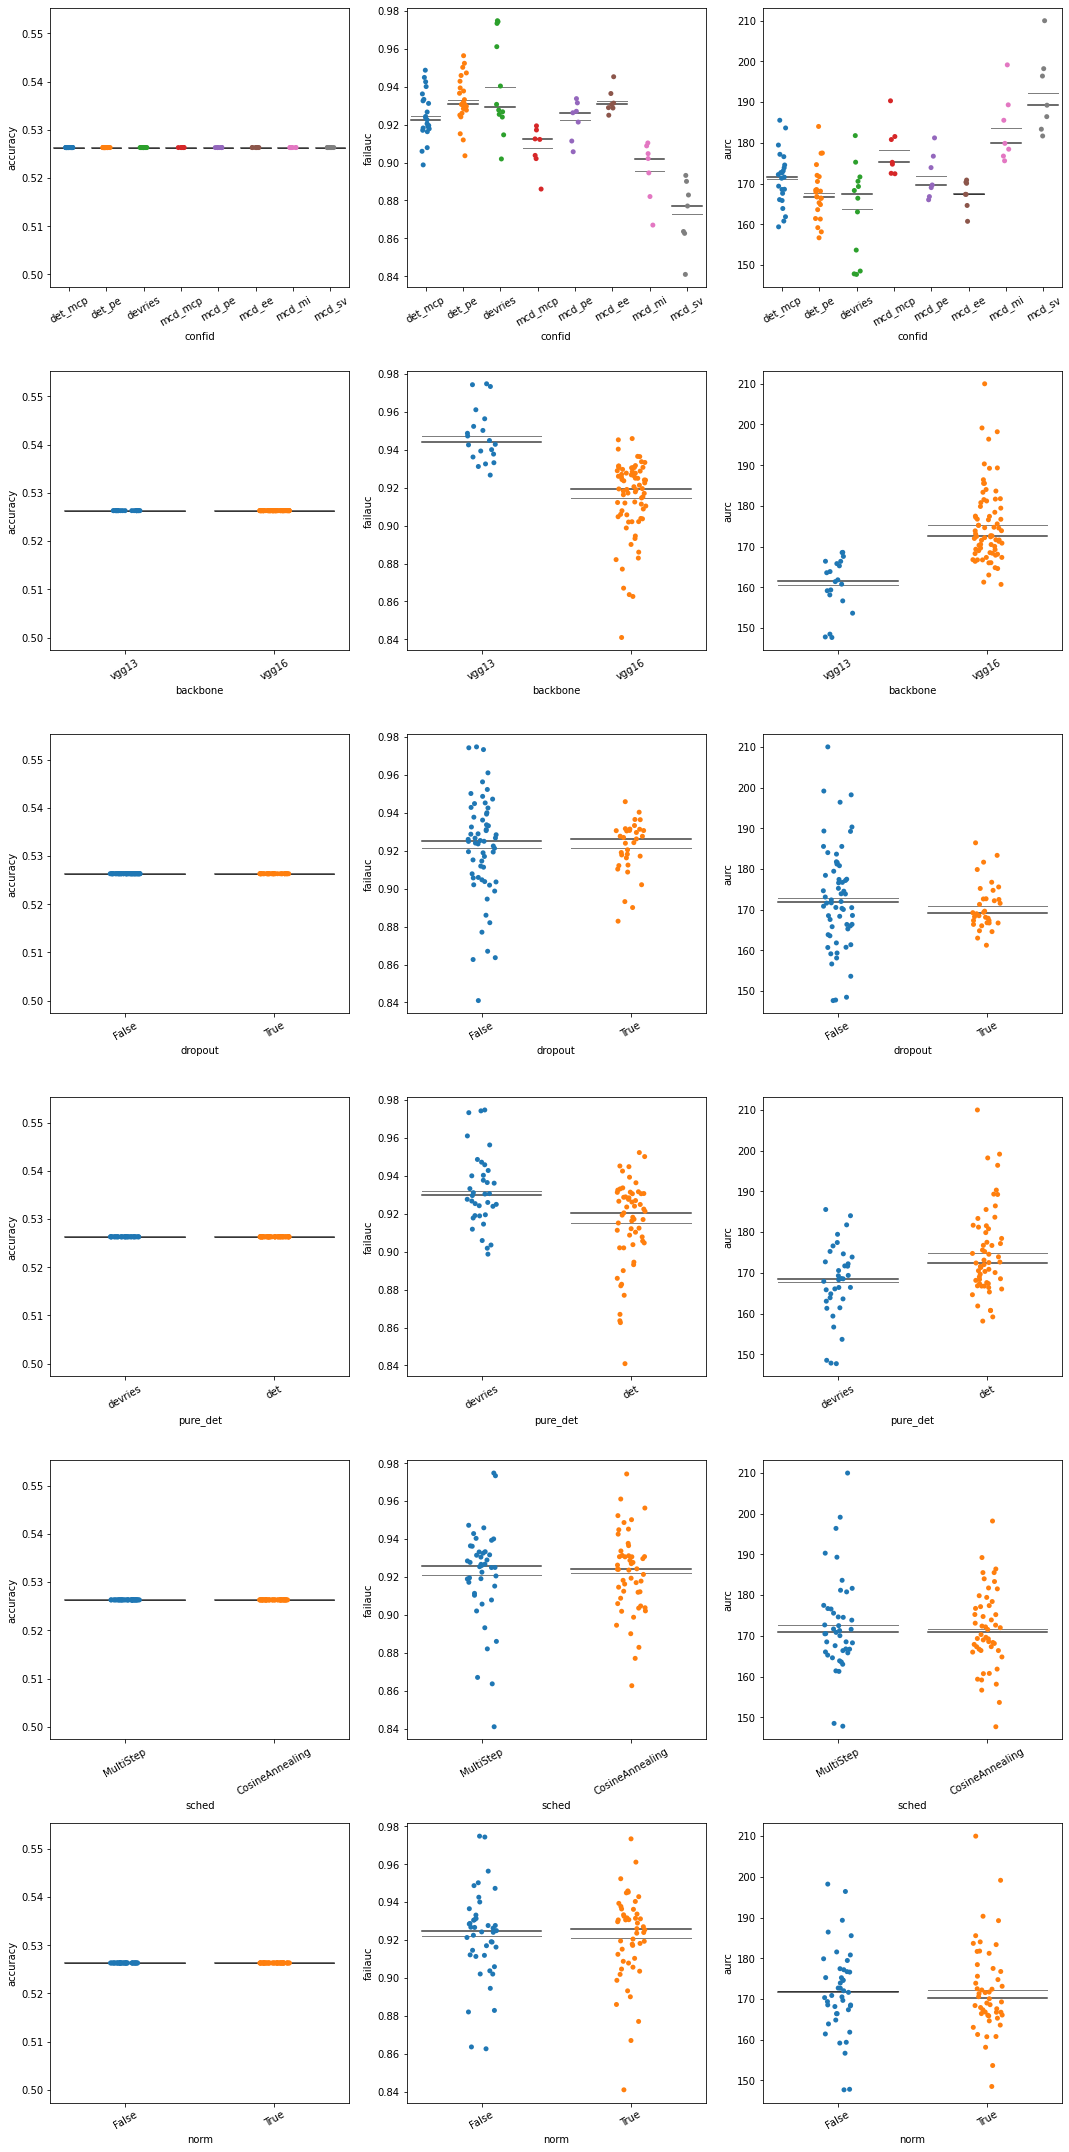

In [15]:
data =  df[(df.study == "new_class_study_tinyimagenet_resize_original_mode") ]
#data =  df[(df.study == "iid_study")  & (df.backbone == "vgg16") ]


dims = ["confid", "backbone", "dropout", "pure_det", "sched", "norm"]
metrics = ["accuracy", "failauc", "aurc"]
scale = 5
f, axs = plt.subplots(nrows=len(dims), ncols=len(metrics), figsize=(len(metrics)*scale, len(dims)*scale))
for xix, dim in enumerate(dims):
    for yix, metric in enumerate(metrics):
        y = metric
        sns.stripplot(ax=axs[xix, yix], x=dim, y=metric, data=data)
        sns.boxplot(ax=axs[xix, yix], x=dim, y=metric, data=data, saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
        axs[xix, yix].set_xticklabels(axs[xix, yix].get_xticklabels(),rotation=30)

plt.tight_layout()

In [18]:
data[["name", "accuracy", "confid", "failauc"]].sort_values(by="failauc", ascending=False)

,name,accuracy,confid,failauc
11,devries_bbvgg13_doFalse_normFalse_schedMultiStep,0.52632,devries,0.97481
41,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,0.52632,devries,0.97433
32,devries_bbvgg13_doFalse_normTrue_schedMultiStep,0.52632,devries,0.97338
56,devries_bbvgg13_doFalse_normTrue_schedCosineAnnealing,0.52632,devries,0.96111
40,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,0.52632,det_pe,0.95635
207,det_devries_bbvgg13_doFalse_normTrue_schedCosineAnnealing,0.52632,det_pe,0.95234
213,det_devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,0.52632,det_pe,0.95021
39,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,0.52632,det_mcp,0.94870
10,devries_bbvgg13_doFalse_normFalse_schedMultiStep,0.52632,det_pe,0.94726
100,devries_bbvgg16_doTrue_normTrue_schedMultiStep,0.52632,det_pe,0.94591


<AxesSubplot:xlabel='sched', ylabel='aurc'>

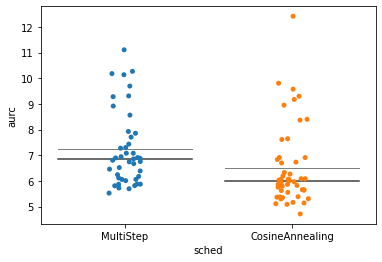

In [61]:
sns.stripplot(x="sched", y="aurc", data=df[(df.study == "iid_study")])
sns.boxplot(x="sched", y="aurc", data=df[(df.study == "iid_study")], saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)



In [21]:
df[(df.name == "devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing")]


,Unnamed: 0,name,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr,backbone,dropout,sched,pure_det,norm
21,0,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,iid_study,devries_model,vgg13,0.0,det_mcp,10000.0,0.94720,0.0188,0.08286,0.93673,0.99594,0.47155,0.32931,0.02767,3.88878,5.30790,0.34848,vgg13,False,CosineAnnealing,devries,False
22,1,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,iid_study,devries_model,vgg13,0.0,det_pe,10000.0,0.94720,0.0188,0.08286,0.93647,0.99589,0.48577,0.38816,0.01229,3.92840,5.34752,0.34470,vgg13,False,CosineAnnealing,devries,False
23,2,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,iid_study,devries_model,vgg13,0.0,devries,10000.0,0.94720,0.0188,0.08286,0.94358,0.99656,0.44349,0.49865,0.09993,3.29603,4.71515,0.34470,vgg13,False,CosineAnnealing,devries,False
27,0,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,new_class_study_tinyimagenet_original_mode,devries_model,vgg13,0.0,det_mcp,19000.0,0.52632,NaN,NaN,0.94372,0.95560,0.92214,0.71370,0.31493,26.43175,162.29813,0.37656,vgg13,False,CosineAnnealing,devries,False
28,1,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,new_class_study_tinyimagenet_original_mode,devries_model,vgg13,0.0,det_pe,19000.0,0.52632,NaN,NaN,0.95078,0.95892,0.93798,0.61074,0.25728,23.98690,159.85327,0.32267,vgg13,False,CosineAnnealing,devries,False
29,2,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,new_class_study_tinyimagenet_original_mode,devries_model,vgg13,0.0,devries,19000.0,0.52632,NaN,NaN,0.96642,0.97456,0.95616,0.15553,0.02769,14.98063,150.84700,0.21467,vgg13,False,CosineAnnealing,devries,False
33,0,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,new_class_study_tinyimagenet_proposed_mode,devries_model,vgg13,0.0,det_mcp,18472.0,0.51278,NaN,NaN,0.96181,0.96598,0.95426,0.75073,0.33022,19.27299,164.00554,0.21111,vgg13,False,CosineAnnealing,devries,False
34,1,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,new_class_study_tinyimagenet_proposed_mode,devries_model,vgg13,0.0,det_pe,18472.0,0.51278,NaN,NaN,0.96624,0.96816,0.96313,0.65483,0.27245,17.71831,162.45087,0.19033,vgg13,False,CosineAnnealing,devries,False
35,2,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,new_class_study_tinyimagenet_proposed_mode,devries_model,vgg13,0.0,devries,18472.0,0.51278,NaN,NaN,0.97839,0.98229,0.97429,0.12166,0.02938,10.01742,154.74997,0.12144,vgg13,False,CosineAnnealing,devries,False
39,0,devries_bbvgg13_doFalse_normFalse_schedCosineAnnealing,new_class_study_tinyimagenet_resize_original_mode,devries_model,vgg13,0.0,det_mcp,19000.0,0.52632,NaN,NaN,0.94870,0.96065,0.92869,0.69387,0.30780,23.49912,159.36550,0.34689,vgg13,False,CosineAnnealing,devries,False
